In [1]:
from sklearn.cluster import KMeans, DBSCAN
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import random

from mpl_toolkits.mplot3d import Axes3D

DATA_PATH = '../matlab/RP_Behav_data.mat'

In [2]:
def get_data_from_mat(index):
    training_data = []
    training_labels = []
    testing_data = []
    testing_labels = []
    data = scipy.io.loadmat(DATA_PATH)
    x = data['RP_top_ft']
    x2 = (data['RP_ft_top_i'][:,index]) - 1
    y = data['behav'][:,index]
    for i in  range(134): #TODO Need to clean this, the loop is pointless but it previously split datasets
        training_data.append(x[i,x2])
        training_labels.append(y[i])
    training_dataset = (np.array(training_data), np.array(training_labels))
    return training_dataset


[0 0 0 1 0 0 0 0 0 0 1 2 1 0 0 0 1 0 0 2 0 0 0 0 1 0 0 2 0 1 0 1 0 1 0 1 0
 2 2 0 1 0 0 0 0 0 2 1 0 1 0 2 1 1 1 0 0 3 0 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0
 1 0 0 1 0 2 1 0 2 2 1 1 0 0 0 0 0 2 1 1 0 0 2 2 2 1 1 1 2 1 1 0 0 0 0 0 0
 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1]
------------------------
[0 1 0 2 0 2 0 0 2 0 0 3 1 0 0 2 1 0 2 2 2 0 2 3 0 0 0 1 0 3 2 0 0 0 2 1 2
 3 3 0 0 1 0 2 0 0 2 2 0 1 2 1 0 1 0 2 0 2 2 2 1 1 0 2 1 1 2 2 2 0 2 0 2 0
 1 2 0 2 2 1 1 0 2 1 0 1 2 1 2 2 0 2 2 1 0 2 2 2 2 1 2 2 2 2 2 0 2 2 2 0 0
 3 2 0 0 0 1 0 0 2 1 1 1 1 2 2 1 0 0 2 0 0 2 2]
------------------------
[3 2 3 0 0 3 0 3 3 3 1 1 1 3 3 3 0 3 3 2 0 0 0 0 1 3 0 1 3 2 0 0 0 1 3 0 1
 1 2 0 2 2 3 0 0 3 2 0 3 3 3 1 3 3 1 0 0 2 0 3 1 1 1 0 0 1 3 2 3 0 1 0 3 3
 2 0 0 1 0 1 3 1 2 1 1 0 3 3 1 0 3 1 1 0 0 1 1 1 2 3 0 0 1 1 1 0 3 3 3 1 3
 2 0 3 3 0 1 3 3 3 0 1 1 0 3 3 1 3 0 3 1 3 0 1]
------------------------
[3 1 0 3 0 3 2 0 0 3 2 3 0 0 3 2 3 0 0 2 3 3 0 3 2 0 3 3 0 1 0 0 2 0 3 3 0
 1 1 0 1 3 0 3 0 0 2 0 3 3 0 3 

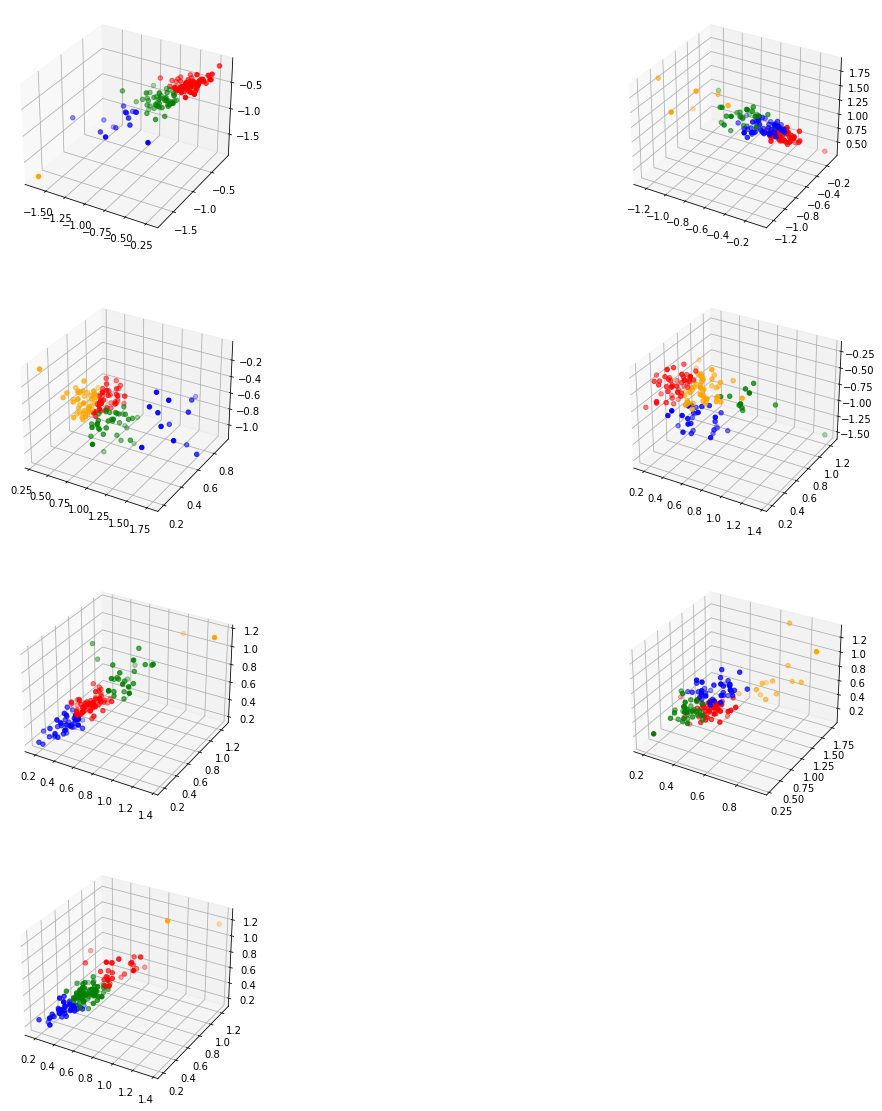

In [50]:
k = 4
colors = ['red', 'green', 'blue', 'orange']
e = 3
s = 5
fig = plt.figure(figsize=(20,20))
for i in range(7):
    ax = fig.add_subplot(4, 2, (i+1), projection='3d')
    plotting = {}
    dataset = get_data_from_mat(i)
#     print(dataset[0].shape)
    kmeans = KMeans(n_clusters=k)
    dbscan = DBSCAN(eps=e, min_samples=s)
    k_results = kmeans.fit_predict(dataset[0][:,0:3])
    print(k_results)
    for c in range(k):
        plotting.setdefault(c, []).append(dataset[0][np.where(k_results==c),0:3])
#     d_results = dbscan.fit_predict(dataset[0])
    print('------------------------')
#     print('Index: {} KMeans: {}'.format(i, k_results))
#     print(plotting[1][0][0][:,0])
    for c in range(k):
#         print(plotting)
        ax.scatter(plotting[c][0][0][:,0],plotting[c][0][0][:,1],plotting[c][0][0][:,2], color=colors[c])
#     print('Index: {} DBSCAN: {}'.format(i, d_results))